##### Clustering:
* Unsupervised Learning
    * Don't tell the machine which classes there are
    * Flat vs. Hierarchal (Set amount of classes, computer figures out)
    * K-Means
        * K, how many clusters there are
        * Take K random members of the fetature set, classify by choosing which one is closet
            * These act as centroids
        * Then find the mean the find a new centroid
        * Recluster until the centroid does not move at all
        * Some maxiterations and tolerance value
        * Downsides: wants to cluster in equal groups
            * Ex: Mouse Data Set
    * Mean Shift
        * Computer finds out by itself the number of classes there are
    * More for research and finding patterns

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans

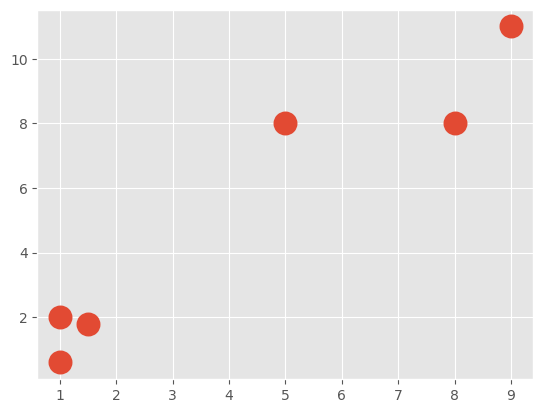

In [7]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
plt.scatter(x=X[:,0], y=X[:,1], s= 150, linewidths = 5)
plt.show()

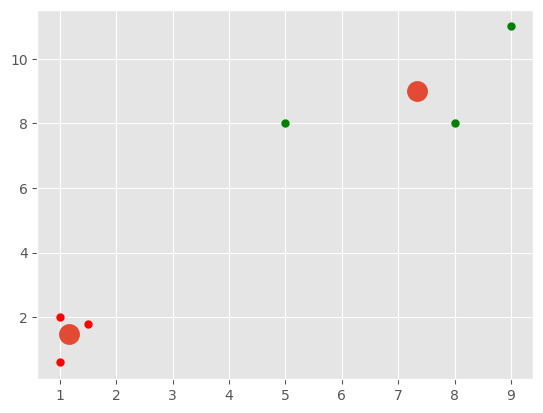

In [13]:
#Having the same amount of n_clusters and samples would just assign a cluster for each sample
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.", "r.", "c.", "b.", "k.", "o."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
    
plt.scatter(centroids[:,0], centroids[:,1], s=100, linewidths = 5)

In [31]:
# K MEANS Titanic

from sklearn import preprocessing, model_selection
import pandas as pd

df = pd.read_excel('titanic.xls')

In [15]:
print(df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

* What should you do with nonnumerical data?
    * Take a set of the column's values
    * Assign a number value to the set
    * How should you translate?
* How to fill in these gaps?

In [32]:
#FLAT CLUSTERING WITH K MEANS
df.drop(['body', 'name'], axis=1, inplace=True)
#df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

In [33]:
def handle_non_numerical_data(df):
    columns = df.columns.values #Taking nonnumerical columns
    
    for column in columns:
        text_digit_vals = {} #Set
        def convert_to_int(val): #Adds value to the set
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype !=np.float64: #If value is not numeric
            column_contents = df[column].values.tolist() #Turn the column into a list and then set
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements: #For every element in this new set
                if unique not in text_digit_vals: #Create unique identifier
                    text_digit_vals[unique] = x
                    x = x + 1
                    
            df[column] = list(map(convert_to_int, df[column])) #Fix the column
    return df

In [34]:
df = handle_non_numerical_data(df)

In [35]:
print(df.head())

   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     737  211.3375    131   
1       1         1    1   0.9167      1      2     489  151.5500      1   
2       1         0    0   2.0000      1      2     489  151.5500      1   
3       1         0    1  30.0000      1      2     489  151.5500      1   
4       1         0    0  25.0000      1      2     489  151.5500      1   

   embarked  boat  home.dest  
0         2     1         70  
1         2    14        320  
2         2     0        320  
3         2     0        320  
4         2     0        320  


In [43]:
#Could predict, probably use SVM
#df.drop(['ticket'], axis=1, inplace=True)
#df.drop(['sibsp', 'cabin', 'embarked', 'home.dest'], axis=1, inplace=True)
#df.drop(['parch'], axis=1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i  in range(len(X)):
    predict_me = np.array(X[i].astype(float)) #Centroid in accuracy is arbitarily chosen
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct+= 1
print(correct/len(X))


/var/folders/pw/0cjrcmjj58q0s780404b1jdc0000gn/T/ipykernel_48423/2524685872.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['survived'], 1).astype(float))


0.24980901451489687


Our Own Method of K Means

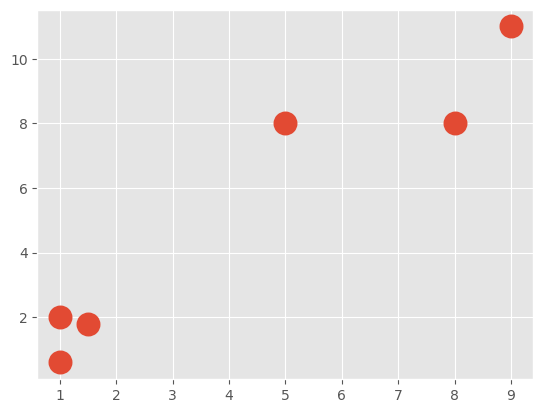

In [44]:
X = np.array([[1,2],[1.5,1.8],[5,8],[8,8],[1,0.6],[9,11]])
plt.scatter(x=X[:,0], y=X[:,1], s= 150, linewidths = 5)
plt.show()

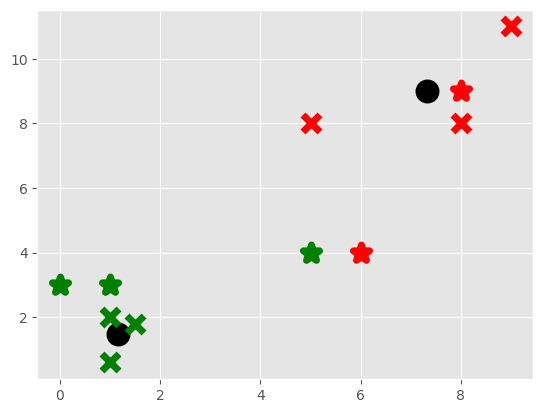

In [57]:
class K_Means:
    #Usually will find centroid after 10-ish iterations
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    # Can train and test on same data, not effect
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
                
            for featureset in data: #List of distances from points to each centroid
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                #pass
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid -original_centroid) / original_centroid * 100) > self.tol:
                    optimized = False
            if optimized:
                break
                
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
clf = K_Means()
clf.fit(X)
colors = 10*["g", "r", "c", "b", "k", "o"]
for centroid in clf.centroids: #Showing centroids
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker="o", color="k", s=150, linewidth=5)

for classification in clf.classifications: #Showing the features
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

        
unknowns = np.array([[1,3],[8,9],[0,3],[5,4], [6,4]])
for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker='*', color = colors[classification], s=150, linewidths=5)
plt.show()